In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import pywt

In [7]:
def circular_convolve_d(h_t, v_j_1, j):
    '''
    jth level decomposition
    h_t: \tilde{h} = h / sqrt(2)
    v_j_1: v_{j-1}, the (j-1)th scale coefficients
    return: w_j (or v_j)
    '''
    N = len(v_j_1)
    L = len(h_t)
    w_j = np.zeros(N)
    l = np.arange(L)
    for t in range(N):
        index = np.mod(t - 2 ** (j - 1) * l, N)
        v_p = np.array([v_j_1[ind] for ind in index])
        w_j[t] = (np.array(h_t) * v_p).sum()
    return w_j

In [24]:
def modwt(x, filters, level=2):
    '''
    filters: 'db1', 'db2', 'haar', ...
    return: see matlab
    '''
    # filter
    wavelet = pywt.Wavelet(filters)
    h = wavelet.dec_hi
    g = wavelet.dec_lo
    h_t = np.array(h) / np.sqrt(2)
    g_t = np.array(g) / np.sqrt(2)
    wavecoeff = []
    v_j_1 = x
    for j in range(level):
        w = circular_convolve_d(h_t, v_j_1, j + 1)
        v_j_1 = circular_convolve_d(g_t, v_j_1, j + 1)
        wavecoeff.append(w)
    wavecoeff.append(v_j_1)
    return np.vstack(wavecoeff)

In [25]:
bitcoin = pd.read_csv("hf_bitcoin.csv")
bitcoin = bitcoin.dropna()
bitcoin.Timestamp = bitcoin.Timestamp.astype(pd.Timestamp)

In [26]:
bitcoin['date'] = pd.to_datetime(bitcoin.Timestamp,unit='s')

In [27]:
resampled_series = bitcoin.set_index("date").Close.resample("6H").mean().interpolate()

In [28]:
log_returns = np.log(resampled_series/resampled_series.shift())
abs_log_returns = np.abs(log_returns)
abs_log_returns = abs_log_returns.dropna()
series_length = abs_log_returns.shape[0]

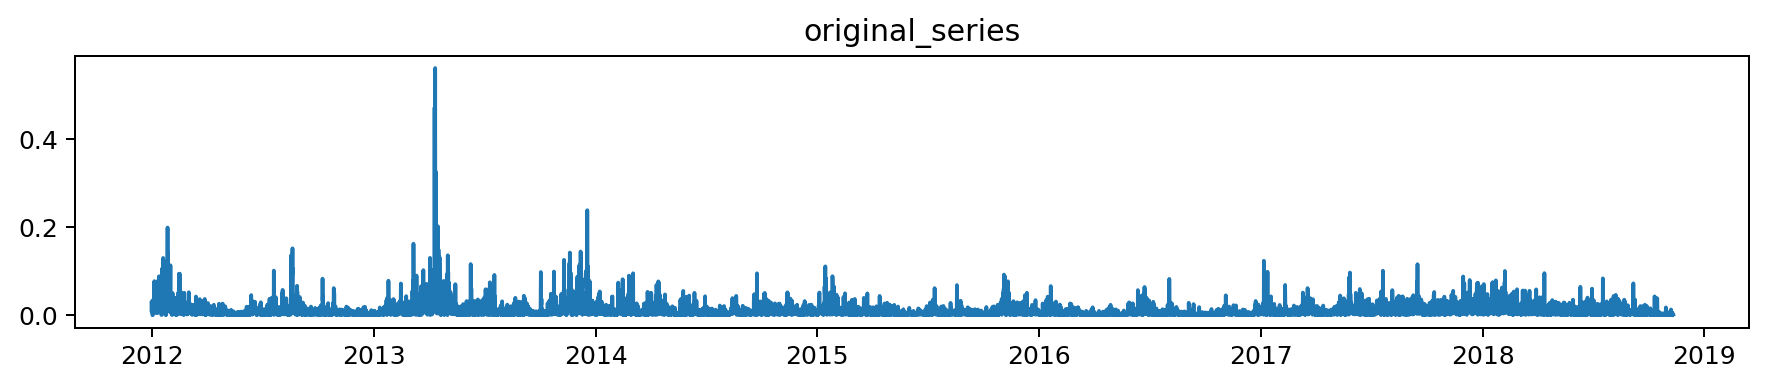

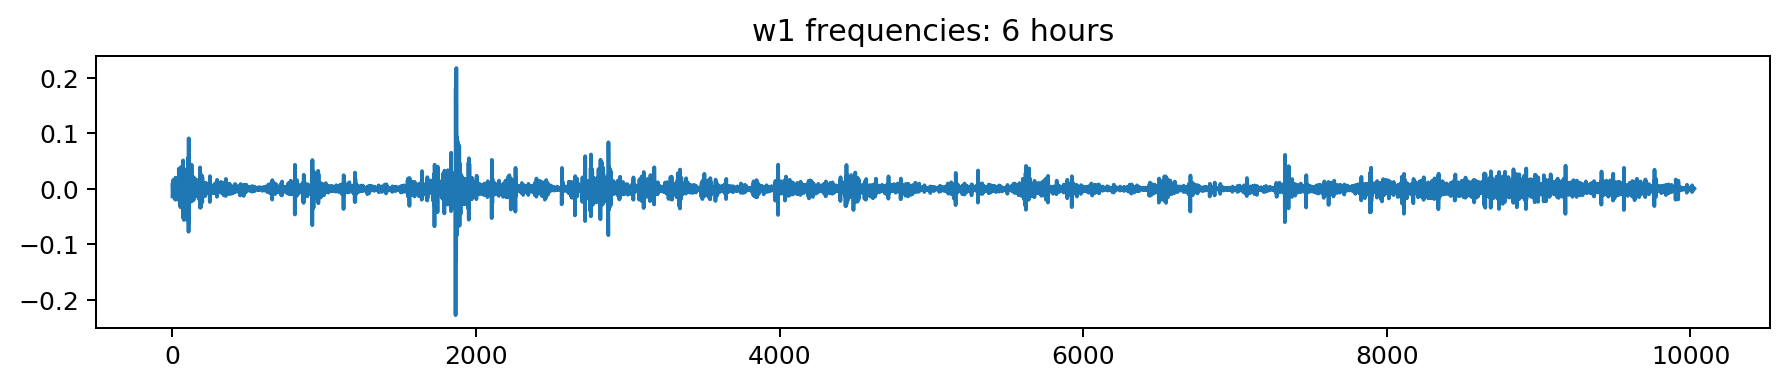

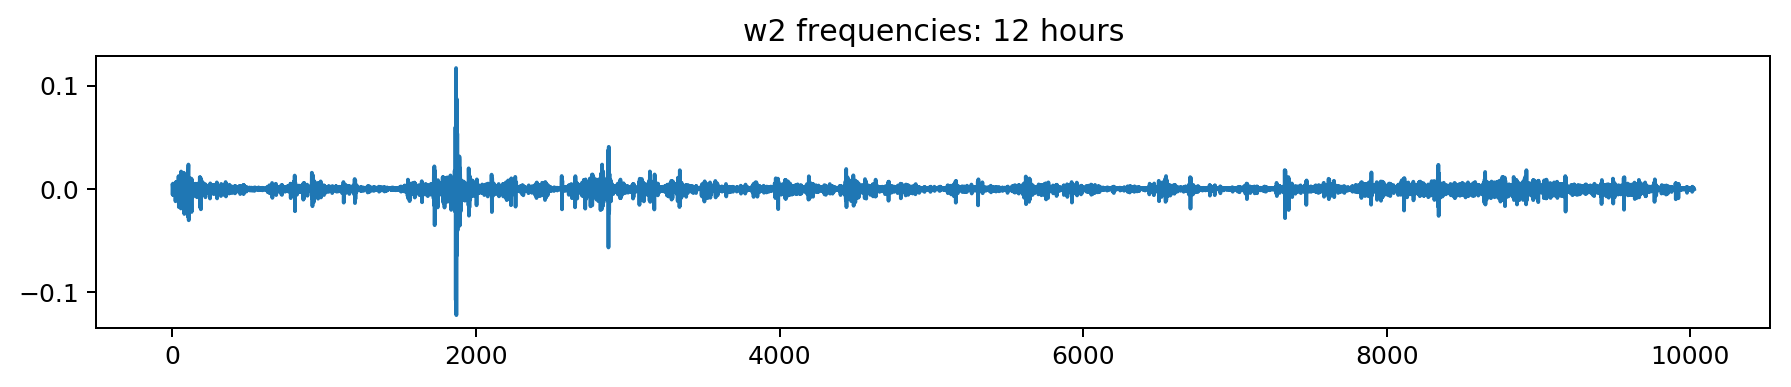

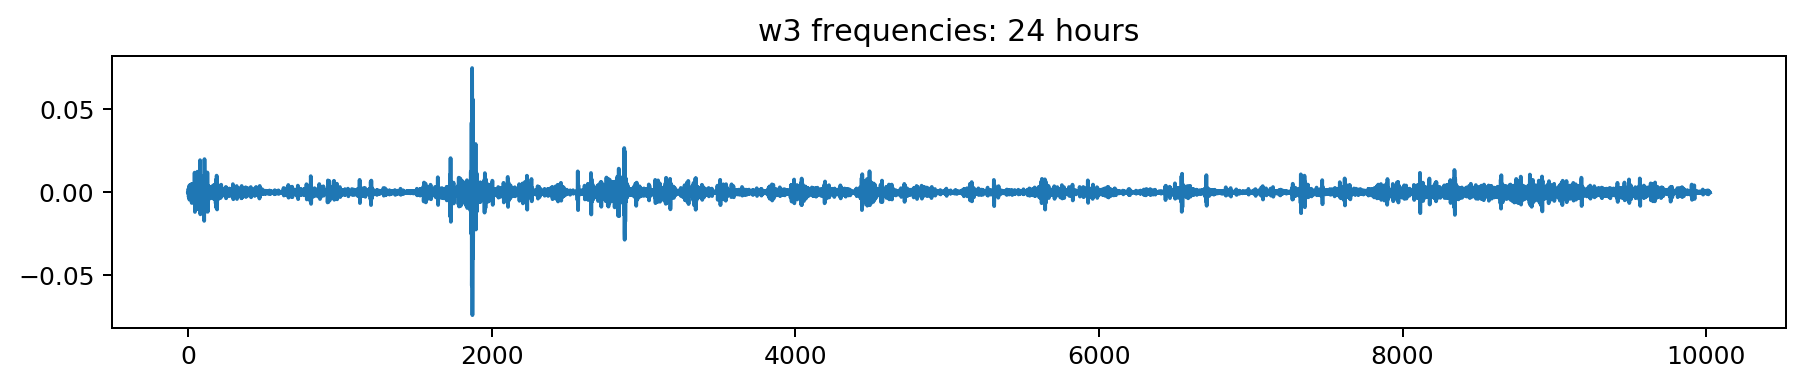

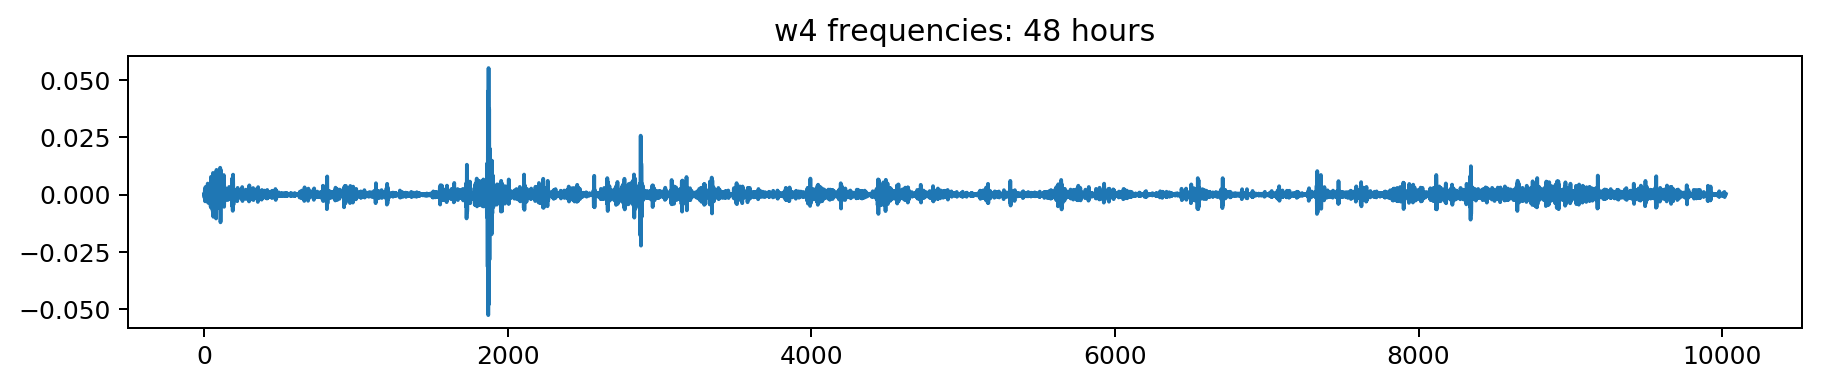

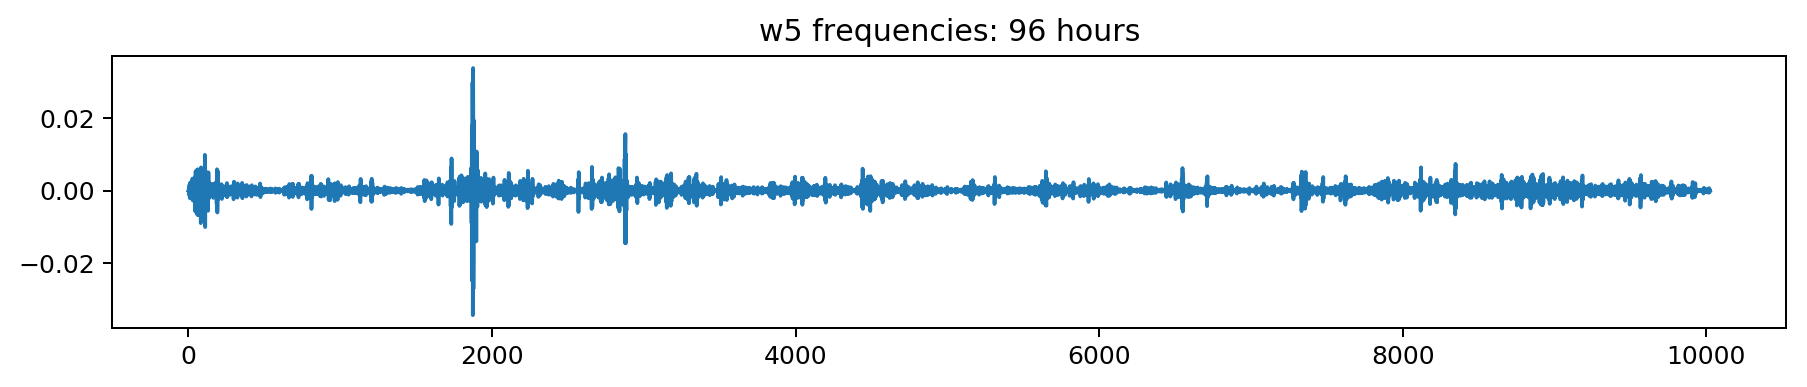

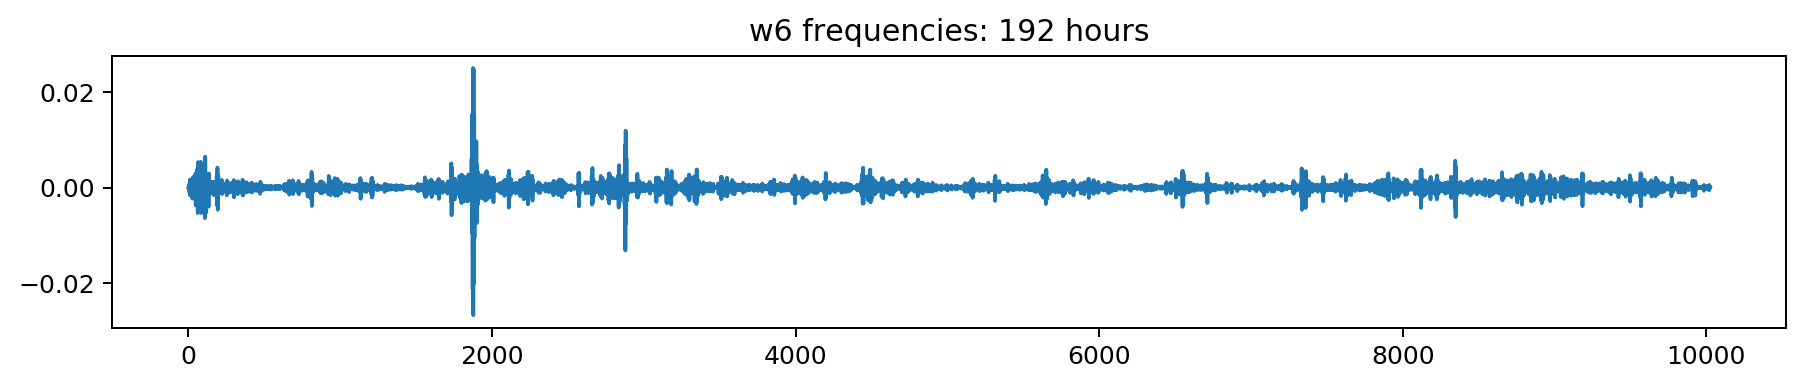

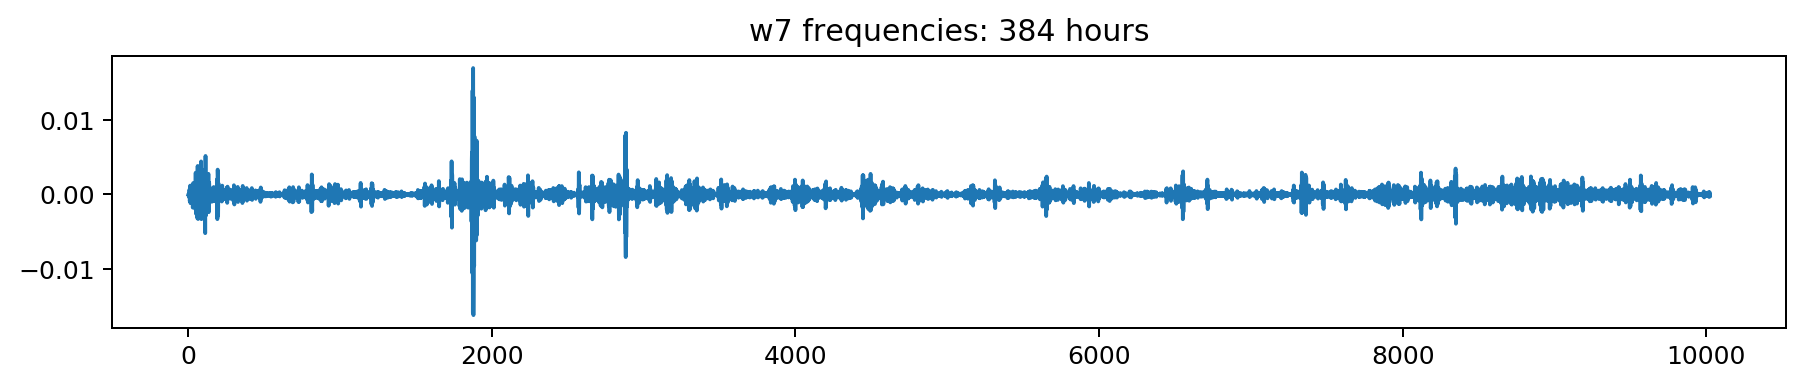

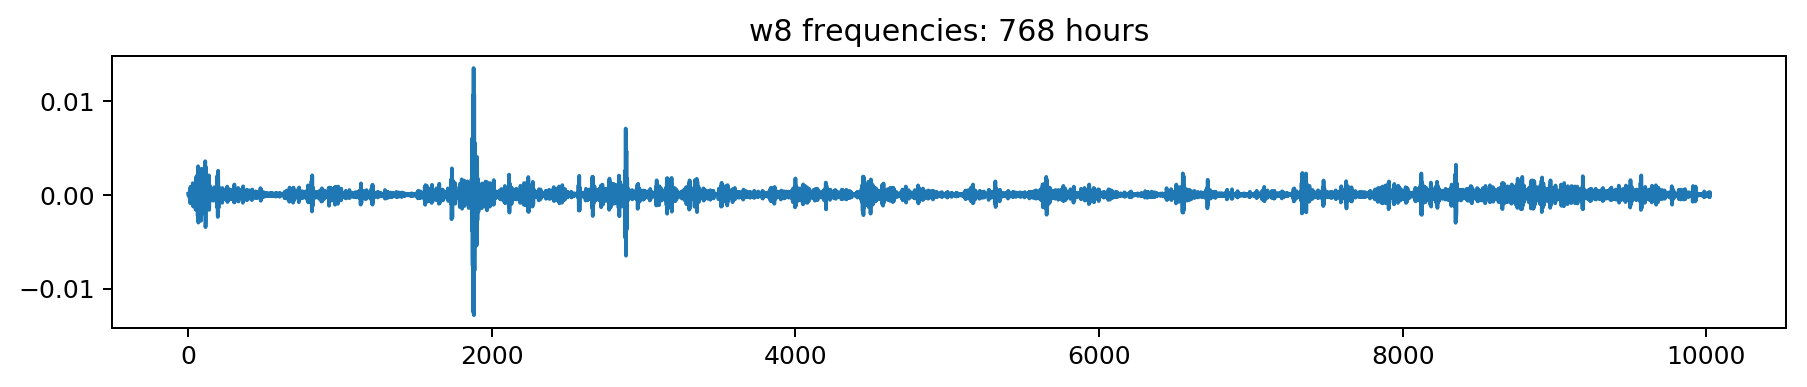

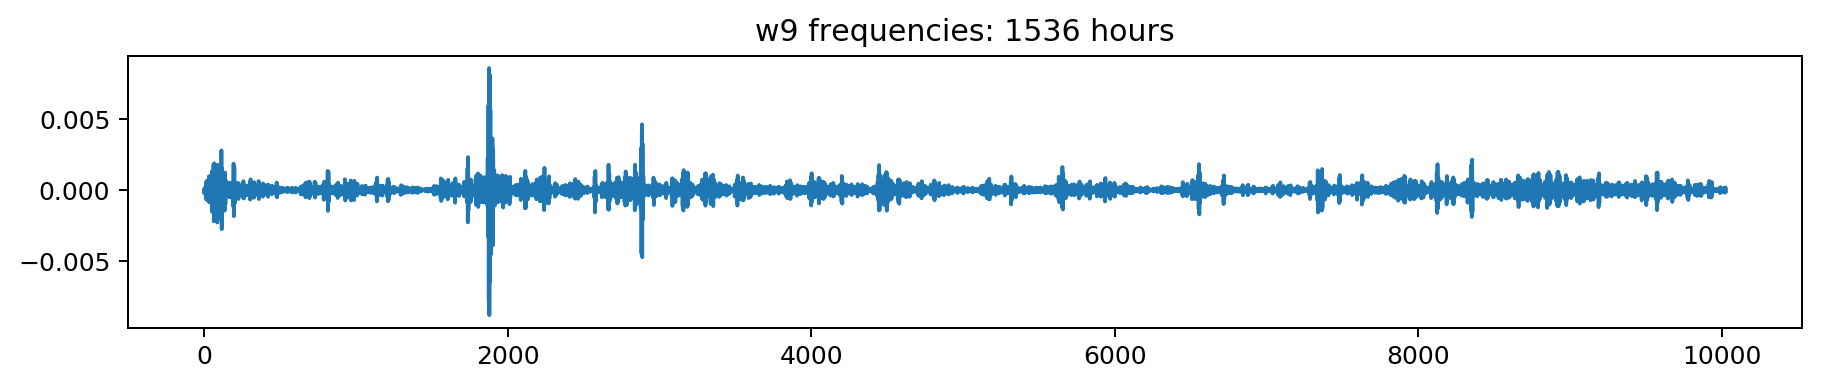

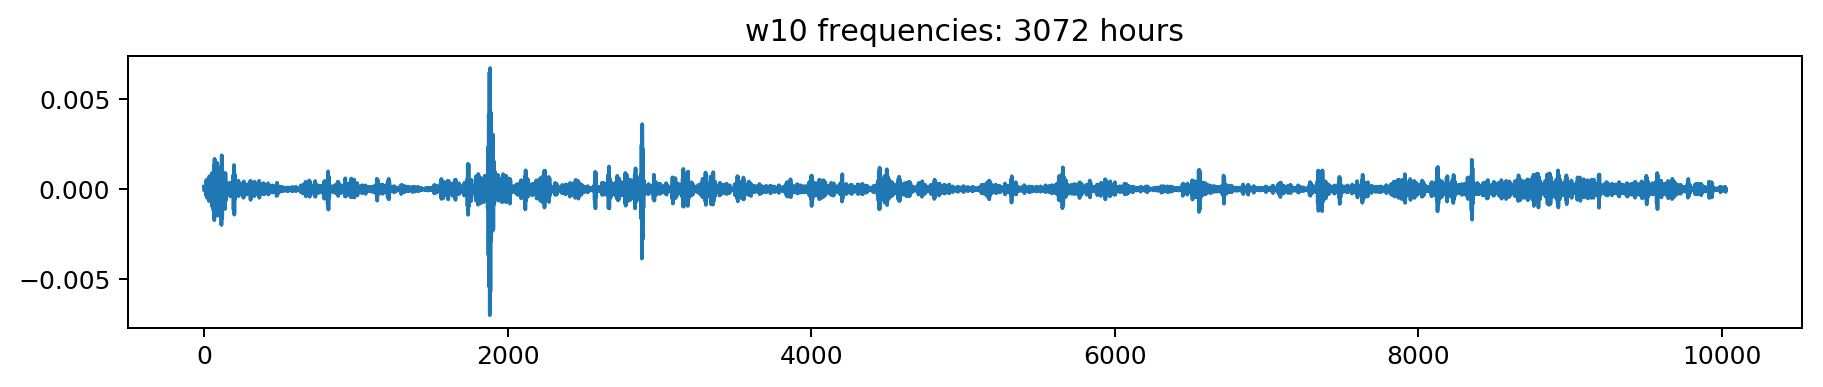

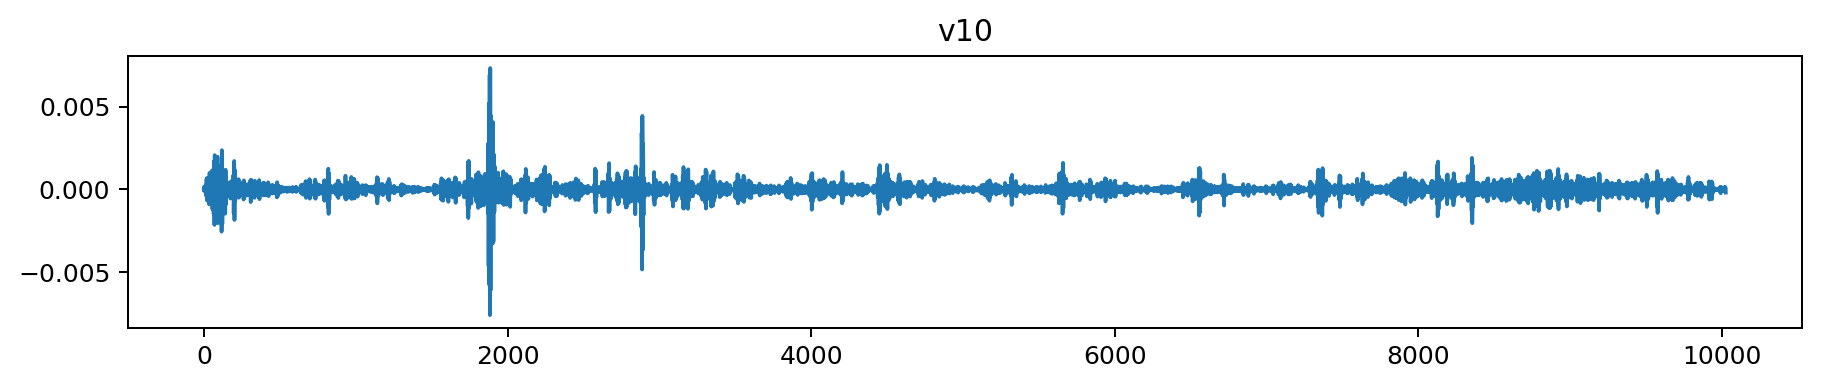

In [29]:
sampling_frequency = 6 #minute 
decompositions = 10
hor_len = 12
vert_len = 2
v_n = abs_log_returns.values
figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot(abs_log_returns)
plt.title("original_series")
plt.show()
for i in range(decompositions):
    results = modwt(v_n, "haar")
    w = results[0]
    v_n = results[1]
    figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
    plt.plot(w)
    plt.title("w"+str(i+1) + " frequencies: "+ str(sampling_frequency*(2**i))+ " hours")
    plt.show()
    
figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot( v_n)
plt.title("v"+str(i+1))
plt.show()


    